In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('data.csv', encoding='latin-1')

In [38]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,581587,22631,CIRCUS PARADE LUNCH BOX,12,12/9/2011 12:50,1.95,12680.0,France
1,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,12/9/2011 12:50,1.65,12680.0,France
2,581587,22555,PLASTERS IN TIN STRONGMAN,12,12/9/2011 12:50,1.65,12680.0,France
3,581587,22728,ALARM CLOCK BAKELIKE PINK,4,12/9/2011 12:50,3.75,12680.0,France
4,581587,22727,ALARM CLOCK BAKELIKE RED,4,12/9/2011 12:50,3.75,12680.0,France


In [39]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.8+ MB


In [41]:
df.index

RangeIndex(start=0, stop=536641, step=1)

In [42]:
df.shape

(536641, 8)

In [43]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [44]:
df['CustomerID'].fillna(df['CustomerID'].mean(), inplace=True)

In [46]:
df['Description'].fillna('Unknown', inplace=True)

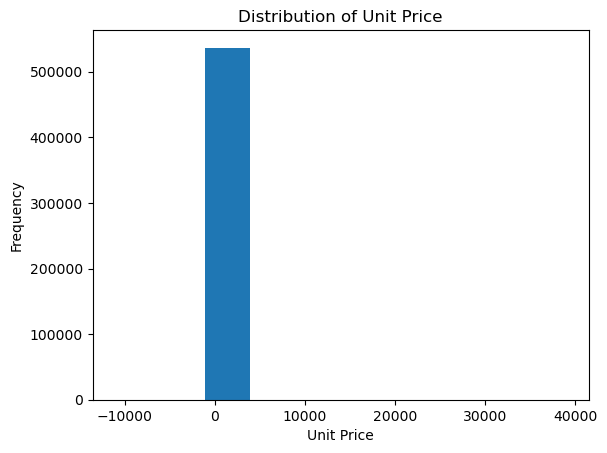

In [50]:
#Histogram
plt.hist(df['UnitPrice'], bins=10)
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Distribution of Unit Price')
plt.show()

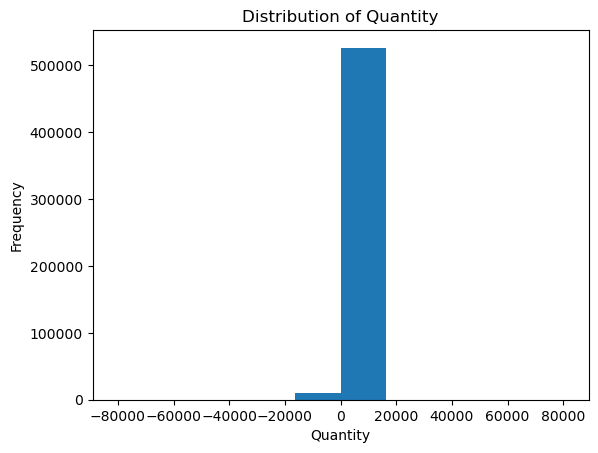

In [51]:
#Histogram
plt.hist(df['Quantity'], bins=10)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()

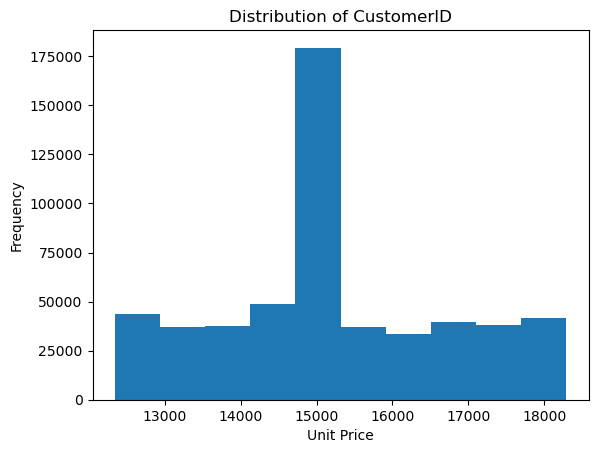

In [56]:
#Histogram
plt.hist(df['CustomerID'], bins=10)
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Distribution of CustomerID')
plt.show()

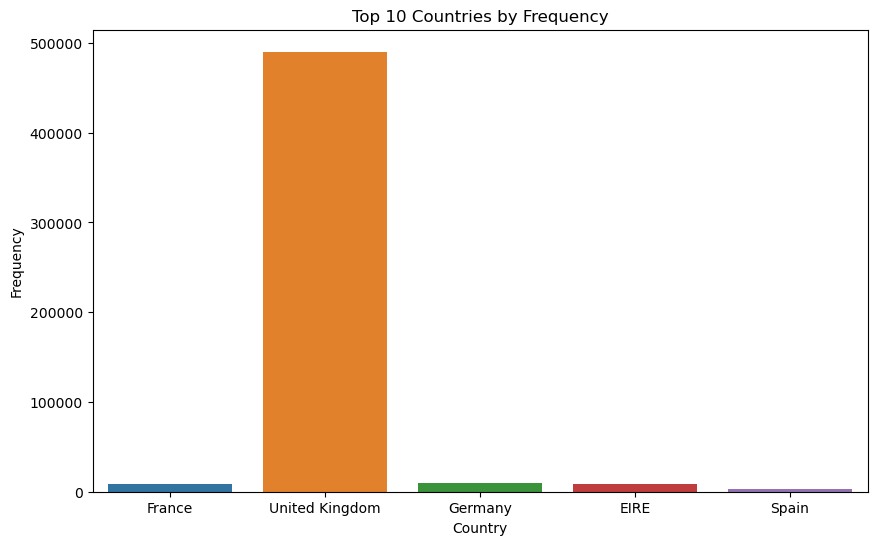

In [61]:
# Get the top 10 countries
top_countries = df['Country'].value_counts().head(5).index

# Filter the dataframe for the top 10 countries
df_top_countries = df[df['Country'].isin(top_countries)]

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', data=df_top_countries)
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Top 10 Countries by Frequency')
plt.show()

In [62]:
#To find the month with the highest sales, you can follow these steps:

#Convert the "InvoiceDate" column to a datetime data type:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Extract the month from the "InvoiceDate" column and create a new column called "Month":
df['Month'] = df['InvoiceDate'].dt.month

#Calculate the total sales for each month by grouping the data by the "Month" column and summing the "Quantity" or "UnitPrice" column (depending on how you define sales):
monthly_sales = df.groupby('Month')['Quantity'].sum()  # or 'UnitPrice' if you define sales differently

#Find the month with the highest sales using the idxmax() function:
month_with_highest_sales = monthly_sales.idxmax()

#Print the month with the highest sales:
print("The month with the highest sales is:", month_with_highest_sales)


The month with the highest sales is: 11


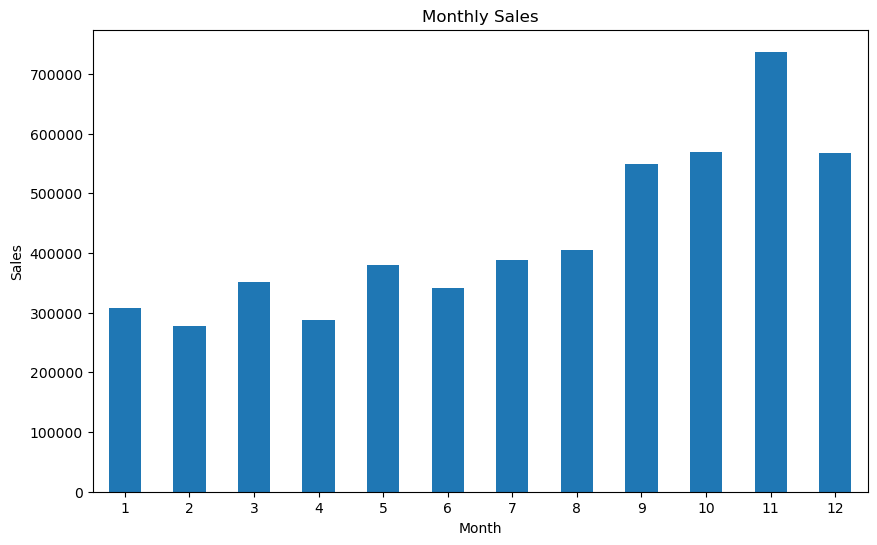

In [63]:
# Create a bar plot
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=0)
plt.show()

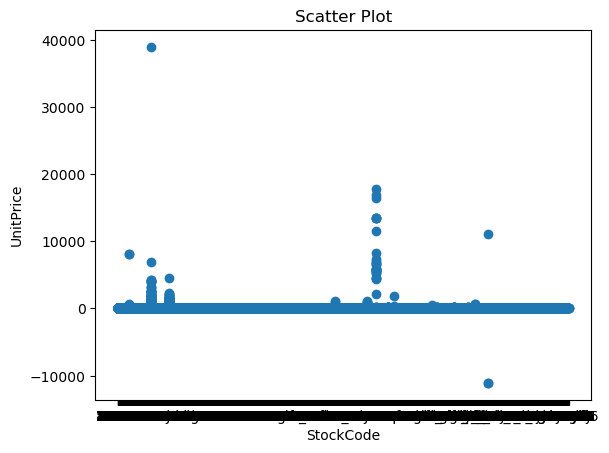

In [64]:
# Scatter plot
plt.scatter(df['StockCode'], df['UnitPrice'])
plt.xlabel('StockCode')
plt.ylabel('UnitPrice')
plt.title('Scatter Plot')
plt.show()

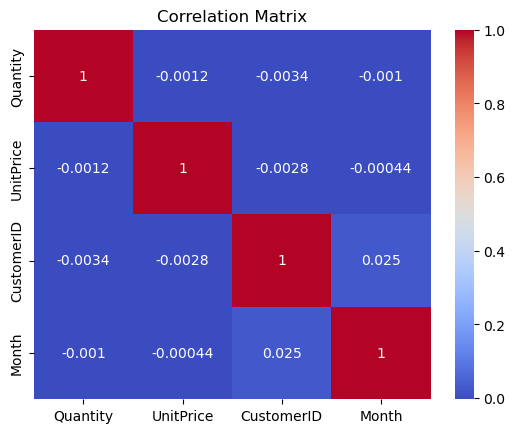

In [65]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<h3> Some Marketing Related Queries </h3>

In [67]:
#Top-selling products: Identify the top-selling products based on the quantity sold.
top_selling_product = df.groupby('Description')['Quantity'].sum().nlargest(5)
print(top_selling_product)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS    53751
JUMBO BAG RED RETROSPOT              47260
POPCORN HOLDER                       36322
ASSORTED COLOUR BIRD ORNAMENT        36282
PACK OF 72 RETROSPOT CAKE CASES      36016
Name: Quantity, dtype: int64


In [69]:
#Customer segmentation: Analyze the customer base by segmenting them into different categories based on their purchasing behavior.
customer_segmentation = df.groupby('CustomerID').agg({'InvoiceNo': 'nunique', 'Quantity': 'sum'})
customer_segmentation = customer_segmentation.sort_values(by='InvoiceNo', ascending=False)
print(customer_segmentation)

              InvoiceNo  Quantity
CustomerID                       
15281.160818       3710    269651
14911.000000        248     77155
12748.000000        224     23750
17841.000000        169     22628
14606.000000        128      5941
...                 ...       ...
14581.000000          1       217
14582.000000          1        73
16738.000000          1         3
16737.000000          1       288
15300.000000          1       292

[4373 rows x 2 columns]


In [70]:
#Seasonal sales trends: Determine if there are any seasonal patterns or trends in sales by examining the monthly sales data.
monthly_sales = df.groupby(df['InvoiceDate'].dt.month)['Quantity'].sum()
print(monthly_sales)

InvoiceDate
1     308281
2     277374
3     351165
4     288237
5     379652
6     340945
7     389051
8     405450
9     548669
10    569749
11    737182
12    566747
Name: Quantity, dtype: int64


In [72]:
#Product popularity over time: Examine the popularity of specific products over different time periods to identify trends or shifts in customer preferences.
product_popularity = df[df['Description'] == 'Product Name'].groupby(df['InvoiceDate'].dt.year)['Quantity'].sum()
print(product_popularity)

Series([], Name: Quantity, dtype: int64)


In [73]:
#Customer retention analysis: Calculate the percentage of customers who made repeat purchases to evaluate customer loyalty.
total_customers = df['CustomerID'].nunique()
repeat_customers = df[df.duplicated(subset='CustomerID')]['CustomerID'].nunique()
retention_rate = repeat_customers / total_customers * 100
print("Customer retention rate: {:.2f}%".format(retention_rate))


Customer retention rate: 98.19%


In [74]:
#Geographic analysis: Analyze sales performance across different countries to identify potential markets or areas for improvement.
country_sales = df.groupby('Country')['Quantity'].sum().nlargest(5)
print(country_sales)


Country
United Kingdom    4250328
Netherlands        200128
EIRE               142495
Germany            117341
France             110438
Name: Quantity, dtype: int64
